# Exploratory Data Analysis

##   Descriptive Statistics :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

### - Wyscout data :

- Importing data :

In [2]:
df_botola_pro = pd.read_excel("C:/Users/pc/Desktop/data/Botola Pro Wyscout data.xlsx", engine="openpyxl")
df_botola_pro.head()

,Joueur,Équipe,Équipe dans la période sélectionnée,Place,Âge,Valeur marchande,Contrat expiration,Matchs joués,Minutes jouées,Buts,...,Buts évités par 90,Passes arrière au gardien de but par 90,Sorties par 90,Duels aériens par 90.1,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %"
0,Y. Attiyat Allah,Wydad Casablanca,Wydad Casablanca,LB,28.0,2500000,NaN,27,2609,2,...,NaN,0.45,NaN,NaN,1.38,0.21,33.33,0.93,0,0.000
1,Y. Jabrane,Wydad Casablanca,Wydad Casablanca,"RDMF, DMF, LDMF",32.0,1900000,NaN,26,2564,4,...,NaN,0.49,NaN,NaN,0.00,0.00,0.00,0.00,3,66.667
2,R. Slim,FAR Rabat,FAR Rabat,"RAMF, RW, RWF",23.0,1600000,NaN,25,2190,8,...,NaN,0.04,NaN,NaN,3.08,0.45,36.36,4.11,5,100.000
3,A. El Hassouni,Wydad Casablanca,Wydad Casablanca,"AMF, CF",28.0,1500000,NaN,24,1990,8,...,NaN,0.05,NaN,NaN,0.23,0.18,50.00,0.27,2,100.000
4,M. Zrida,Raja Casablanca,Raja Casablanca,"AMF, LCMF",24.0,1400000,2025-06-30,25,2009,4,...,NaN,0.18,NaN,NaN,0.49,0.00,0.00,1.08,0,0.000


- Some informations about the dataset : 

In [3]:
df_botola_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Columns: 115 entries, Joueur to Transformation des penalties, %
dtypes: float64(88), int64(18), object(9)
memory usage: 433.2+ KB


- Summary statistics of the dataset perimetres :

In [4]:
df_botola_pro.describe()

,Âge,Valeur marchande,Matchs joués,Minutes jouées,Buts,xG,Passes décisives,xA,Duels par 90,"Duels gagnés, %",...,Buts évités par 90,Passes arrière au gardien de but par 90,Sorties par 90,Duels aériens par 90.1,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %"
count,446.000000,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,440.000000,440.000000,...,0.0,440.000000,0.0,0.0,440.000000,440.000000,440.000000,440.000000,482.000000,482.000000
mean,26.210762,2.053734e+05,14.082988,1001.155602,1.024896,1.166100,0.585062,0.654564,17.492432,47.944159,...,NaN,0.392864,NaN,NaN,0.282932,0.054409,6.082773,0.431841,0.213693,7.556313
std,3.882600,2.856121e+05,8.804965,822.359995,1.845206,1.709321,1.110349,0.979703,5.351453,10.068222,...,NaN,0.541255,NaN,NaN,0.522591,0.147875,19.544059,0.832192,0.783125,25.295768
min,17.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.150000,25.000000,...,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000e+00,6.000000,230.250000,0.000000,0.060000,0.000000,0.000000,13.610000,40.777500,...,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,1.250000e+05,14.000000,825.500000,0.000000,0.465000,0.000000,0.240000,16.965000,48.215000,...,NaN,0.175000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,3.250000e+05,22.000000,1696.000000,1.000000,1.547500,1.000000,0.877500,20.687500,55.142500,...,NaN,0.565000,NaN,NaN,0.300000,0.000000,0.000000,0.460000,0.000000,0.000000
max,41.000000,2.500000e+06,30.000000,2912.000000,13.000000,11.870000,8.000000,6.130000,34.160000,74.440000,...,NaN,3.670000,NaN,NaN,3.240000,1.360000,100.000000,6.670000,7.000000,100.000000


- Histograms of the numerical variables

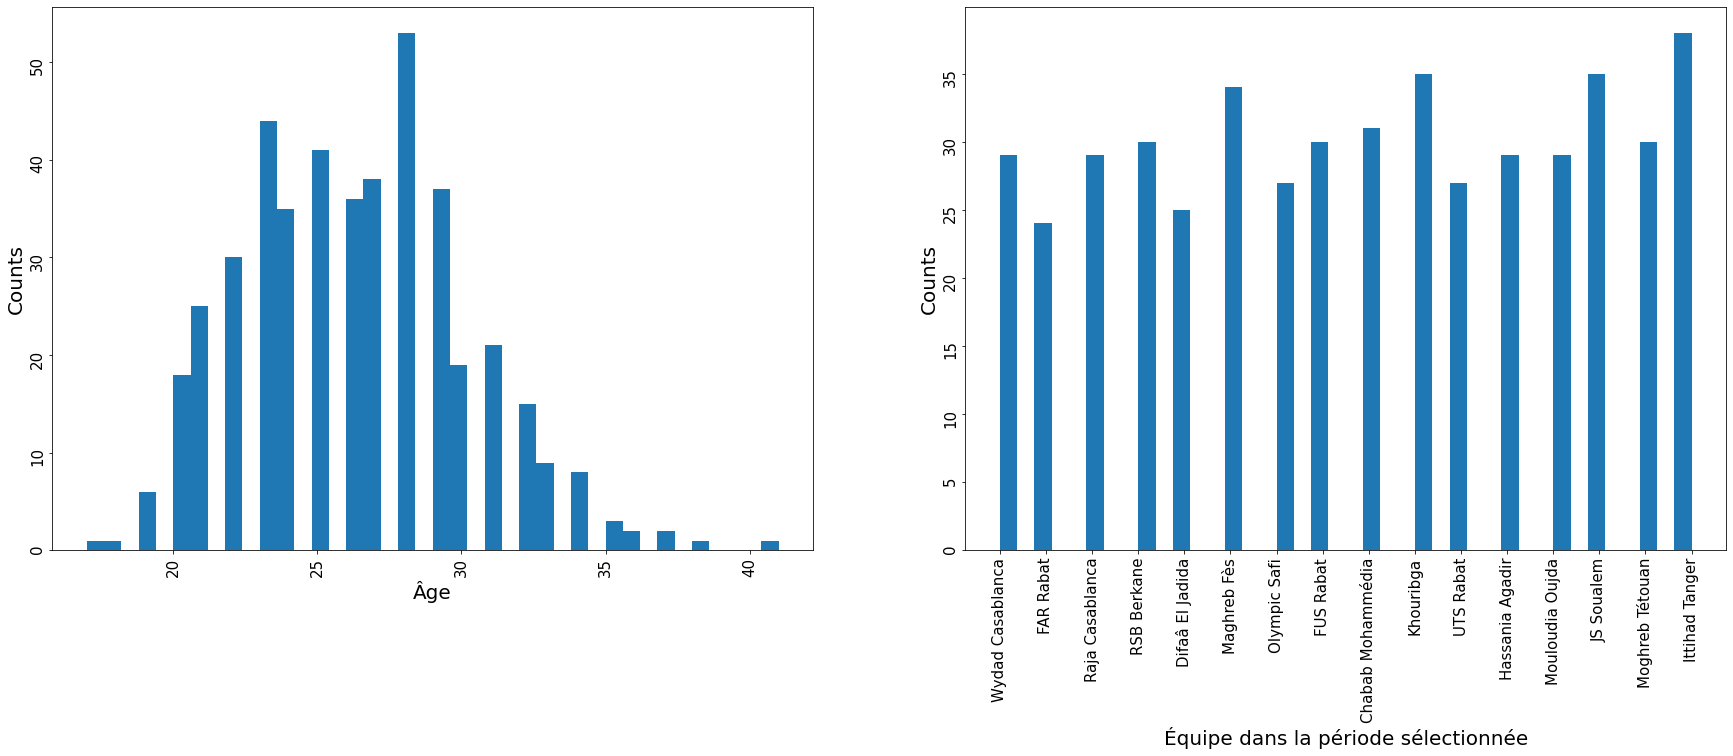

In [6]:
plt.rcParams['figure.figsize'] = (30, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Specify the features of interest
num_features = ['Âge', 'Équipe dans la période sélectionnée']
xaxes = num_features
yaxes = ['Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_botola_pro[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15, rotation=90)

## Correlation Analysis :

### WyScout data :

In [7]:
df_botola_pro.corr()

,Âge,Valeur marchande,Matchs joués,Minutes jouées,Buts,xG,Passes décisives,xA,Duels par 90,"Duels gagnés, %",...,Buts évités par 90,Passes arrière au gardien de but par 90,Sorties par 90,Duels aériens par 90.1,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %"
Âge,1.000000,0.257957,0.219080,0.229787,0.015605,0.031055,0.104833,0.137550,-0.167554,0.074958,...,NaN,0.110596,NaN,NaN,0.108079,0.039478,0.032764,0.006336,0.037998,0.053473
Valeur marchande,0.257957,1.000000,0.455234,0.501368,0.315454,0.327287,0.340960,0.368893,-0.116229,0.113441,...,NaN,0.096365,NaN,NaN,0.143749,0.048008,0.146474,0.053500,0.253953,0.259764
Matchs joués,0.219080,0.455234,1.000000,0.930841,0.463225,0.549177,0.455201,0.563239,0.036857,0.097832,...,NaN,-0.034153,NaN,NaN,0.064955,0.016319,0.184531,0.007252,0.213000,0.214651
Minutes jouées,0.229787,0.501368,0.930841,1.000000,0.431506,0.502784,0.443997,0.543955,-0.129048,0.273652,...,NaN,0.128570,NaN,NaN,0.069981,0.034136,0.182495,-0.042683,0.267883,0.237108
Buts,0.015605,0.315454,0.463225,0.431506,1.000000,0.885841,0.388621,0.380591,0.194031,-0.211057,...,NaN,-0.155081,NaN,NaN,0.117537,0.109376,0.180722,0.070844,0.594822,0.514888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Coups francs directs par 90,0.039478,0.048008,0.016319,0.034136,0.109376,0.064205,0.140468,0.168626,-0.038648,0.046065,...,NaN,-0.054526,NaN,NaN,0.642763,1.000000,0.397894,0.351456,0.235095,0.236201
"Coups francs directs à la cible, %",0.032764,0.146474,0.184531,0.182495,0.180722,0.142021,0.224489,0.303351,-0.004381,0.043386,...,NaN,-0.096551,NaN,NaN,0.367644,0.397894,1.000000,0.270722,0.131268,0.212416
Corners par 90,0.006336,0.053500,0.007252,-0.042683,0.070844,0.056116,0.322609,0.435770,0.056273,-0.113176,...,NaN,-0.207443,NaN,NaN,0.719885,0.351456,0.270722,1.000000,0.215614,0.163521
Penalties pris,0.037998,0.253953,0.213000,0.267883,0.594822,0.576266,0.319758,0.333164,0.019323,-0.029865,...,NaN,-0.030477,NaN,NaN,0.294990,0.235095,0.131268,0.215614,1.000000,0.757907


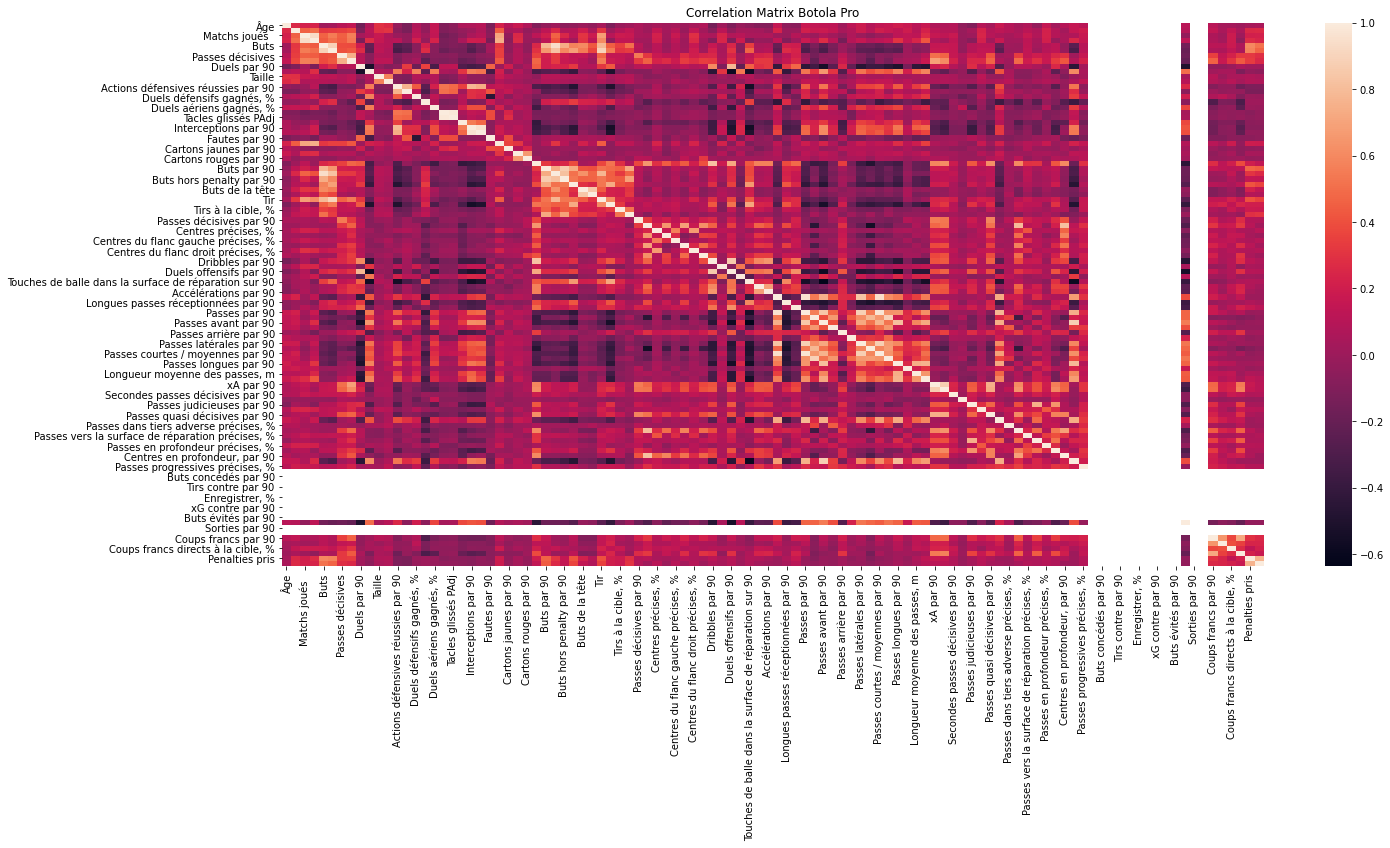

In [12]:
plt.figure(figsize=(22, 10))
sns.heatmap(df_botola_pro.corr())
plt.title("Correlation Matrix Botola Pro")
plt.show()

## Missing data :

### WyScout data :

In [13]:
df_botola_pro.isnull()

,Joueur,Équipe,Équipe dans la période sélectionnée,Place,Âge,Valeur marchande,Contrat expiration,Matchs joués,Minutes jouées,Buts,...,Buts évités par 90,Passes arrière au gardien de but par 90,Sorties par 90,Duels aériens par 90.1,Coups francs par 90,Coups francs directs par 90,"Coups francs directs à la cible, %",Corners par 90,Penalties pris,"Transformation des penalties, %"
0,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,False
478,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,False
479,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False
480,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,False


In [14]:
df_botola_pro.isnull().sum()

Joueur                                  0
Équipe                                  2
Équipe dans la période sélectionnée     0
Place                                   0
Âge                                    36
                                       ..
Coups francs directs par 90            42
Coups francs directs à la cible, %     42
Corners par 90                         42
Penalties pris                          0
Transformation des penalties, %         0
Length: 115, dtype: int64

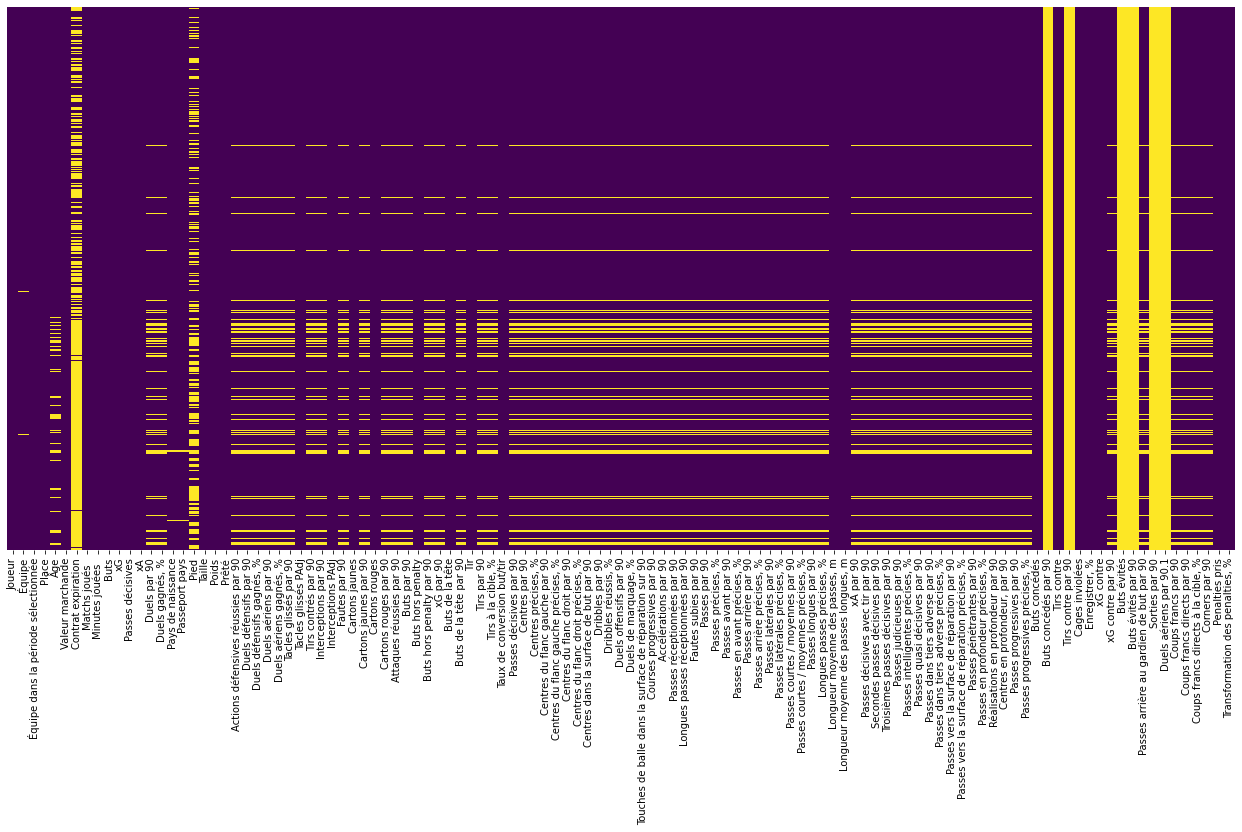

In [15]:
plt.figure(figsize=(22, 10))

sns.heatmap(df_botola_pro.isnull(),yticklabels=False,cbar=False,cmap='viridis')

plt.show()

## Feature Importance & Selection:

### WyScout:

<ipython-input-16-4a9c62e47edb>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_botola_pro_cleaned['Place'] = df_botola_pro_cleaned['Place'].apply(map_position)


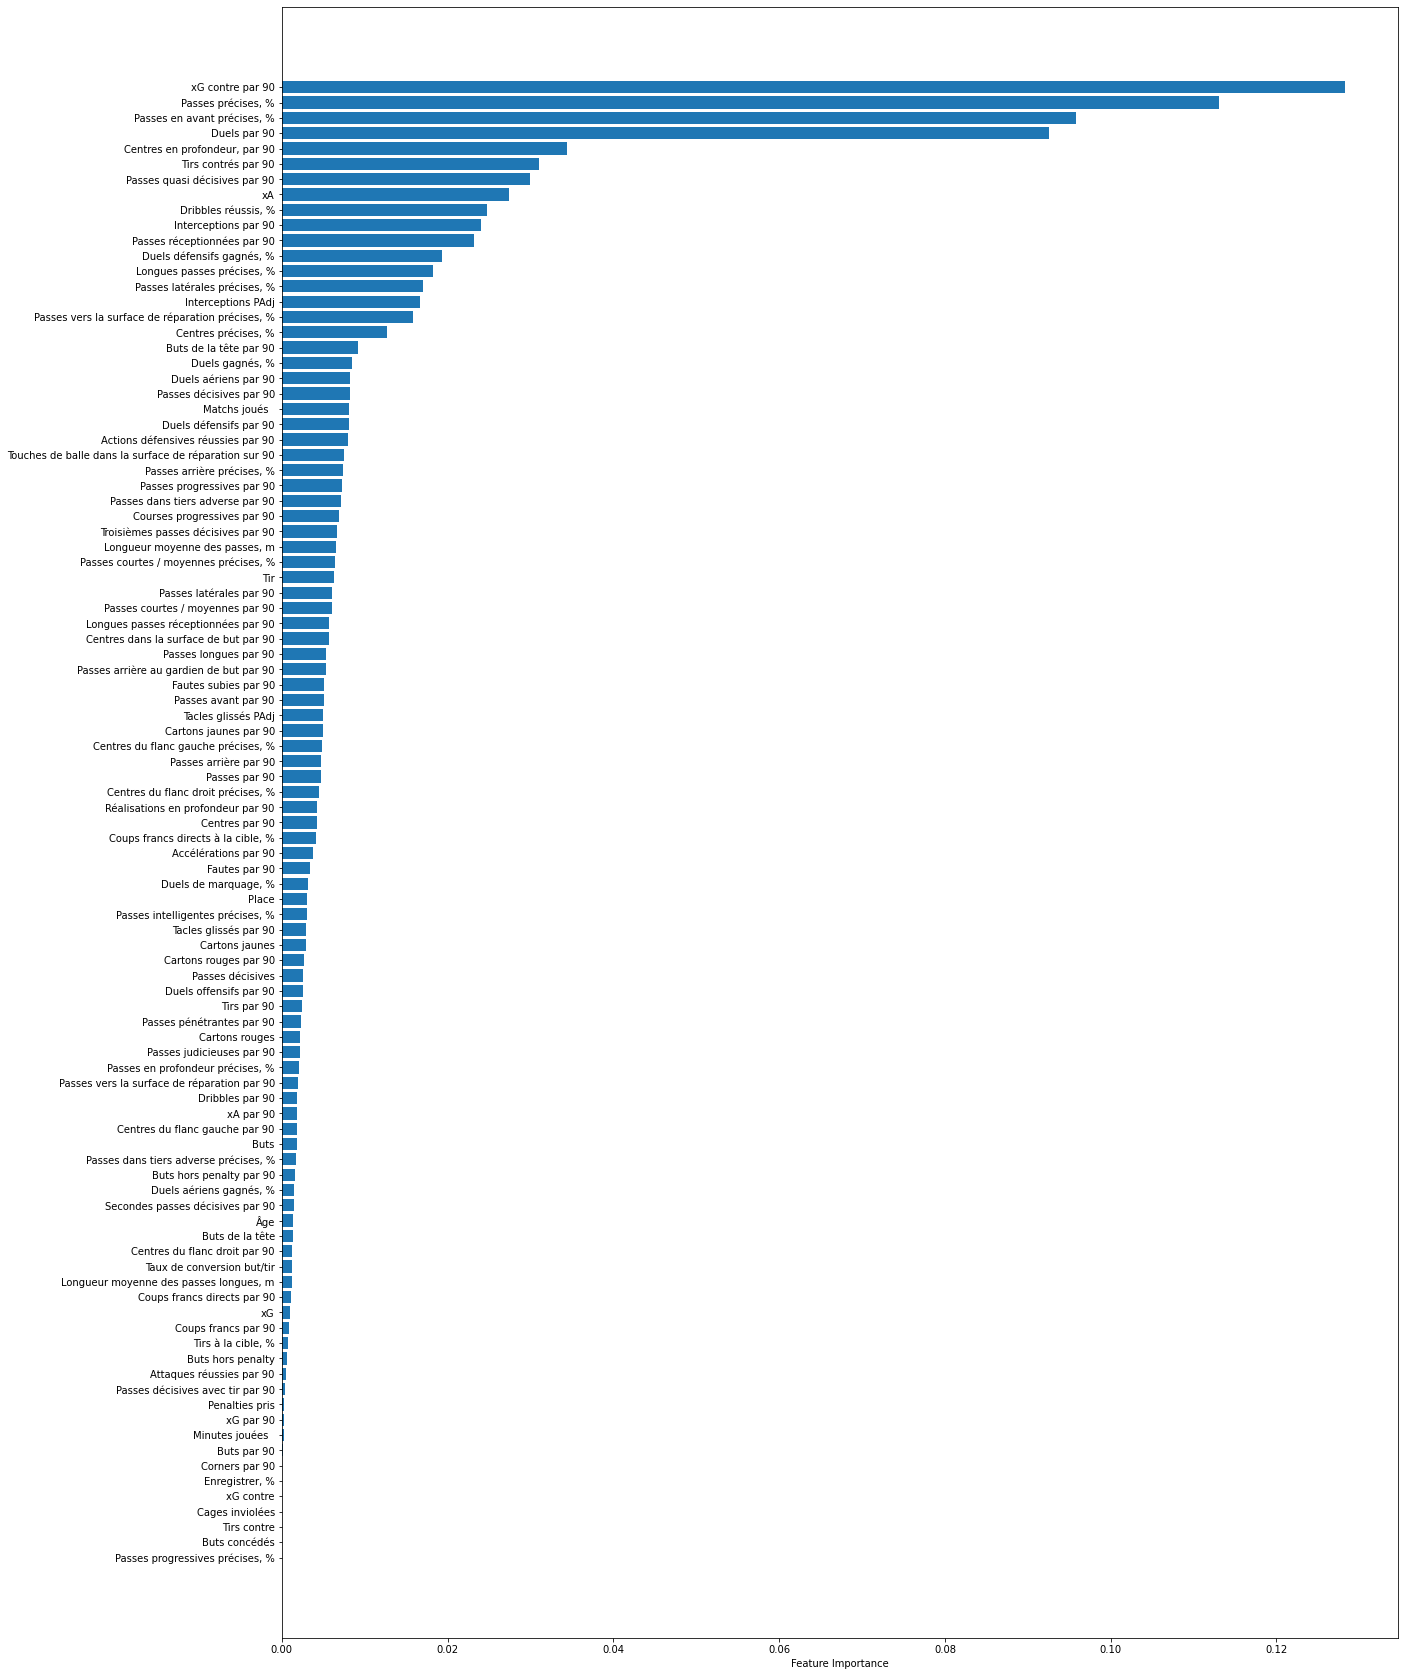

In [16]:
df_botola_pro_cleaned = df_botola_pro

features_list = df_botola_pro.columns.tolist()  # Extract all column names as a list


features_to_remove = ['Joueur', 'Équipe', 'Équipe dans la période sélectionnée', 'Contrat expiration', 'Prêté', 'Pied', 'Pays de naissance', 'Passeport pays', 'Valeur marchande', 'Buts concédés par 90', 'Buts évités', 'Buts évités par 90', 'Tirs contre par 90', 'Sorties par 90', 'Duels aériens par 90.1', 'Taille', 'Poids']
features_list = [feature for feature in features_list if feature not in features_to_remove]


df= df_botola_pro_cleaned[features_list]
df_botola_pro_cleaned = df.dropna()

X = df_botola_pro_cleaned.drop('Place', axis=1)



# Check if there are remaining samples
if X.shape[0] == 0:
    raise ValueError("No samples remaining after cleaning the dataset.")
    
def map_position(place):
    if 'AMF' in place or 'CMF' in place or 'DMF' in place:
        return 'Midfield'
    elif 'CF' in place or 'WF' in place or 'LW' in place or 'RW' in place:
        return 'Forward'
    elif 'CB' in place or 'LB' in place or 'RB' in place:
        return 'Defense'
    else:
        return place

df_botola_pro_cleaned['Place'] = df_botola_pro_cleaned['Place'].apply(map_position)

# Convert categorical target variable to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_botola_pro_cleaned['Place'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.figure(figsize=(20, 30))
plt.barh(np.array(features_list)[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()


## Dataset Cleaning and Filtering:

- First we are going to remove players with played minutes less then 40 min :

In [17]:
df_botola_pro = df_botola_pro[df_botola_pro['Minutes jouées  '] > 40]

- Second, we are going to remove columns which contains only null values :

In [18]:
columns_to_remove = ['Contrat expiration', 'Buts concédés par 90', 'Buts évités', 'Buts évités par 90', 'Tirs contre par 90', 'Sorties par 90', 'Duels aériens par 90.1']
df_botola_pro = df_botola_pro.drop(columns=columns_to_remove)

- Next we are going to fill the null cells in "Pied" column with 'unknown' :

In [19]:
df_botola_pro['Pied'] = df_botola_pro['Pied'].fillna('unknown')

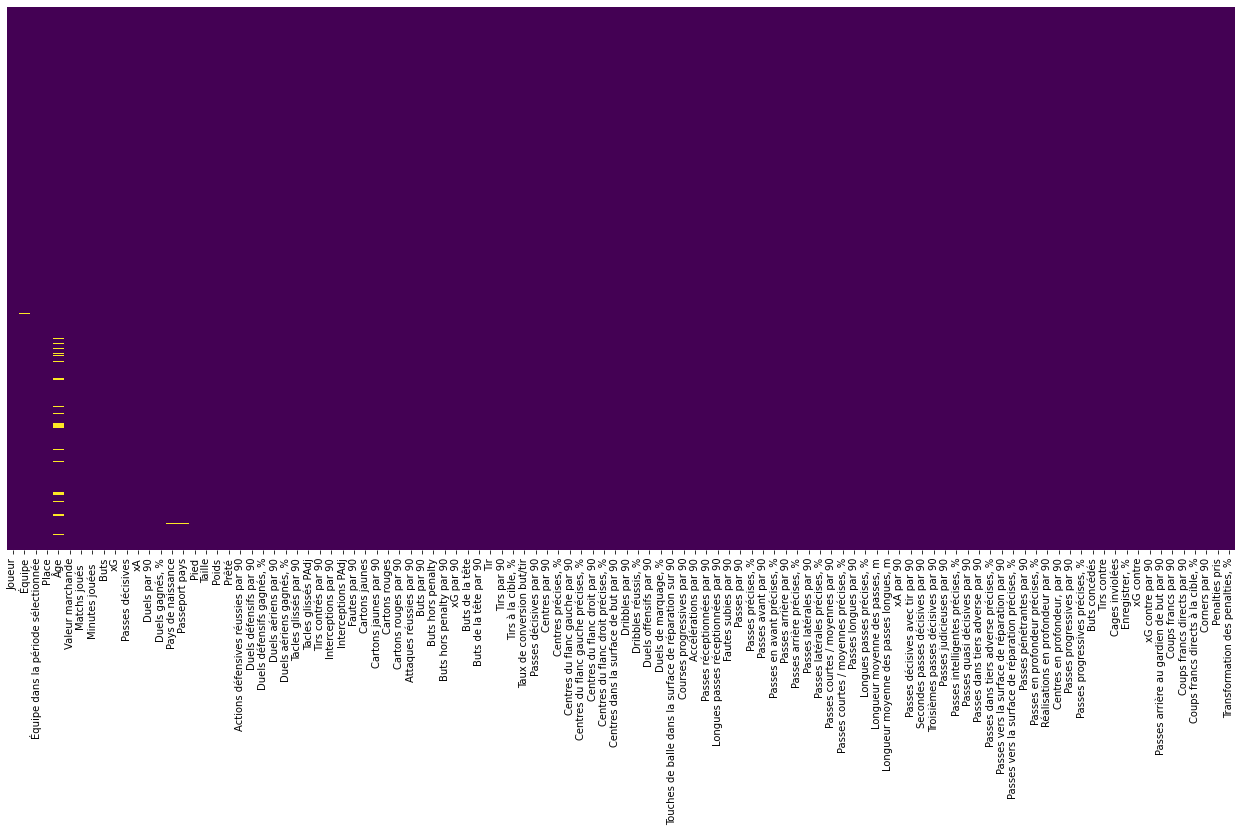

In [20]:
plt.figure(figsize=(22, 10))

sns.heatmap(df_botola_pro.isnull(),yticklabels=False,cbar=False,cmap='viridis')

plt.show()

In [103]:
df_botola_pro.shape

(440, 108)

<ipython-input-21-4a9c62e47edb>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_botola_pro_cleaned['Place'] = df_botola_pro_cleaned['Place'].apply(map_position)


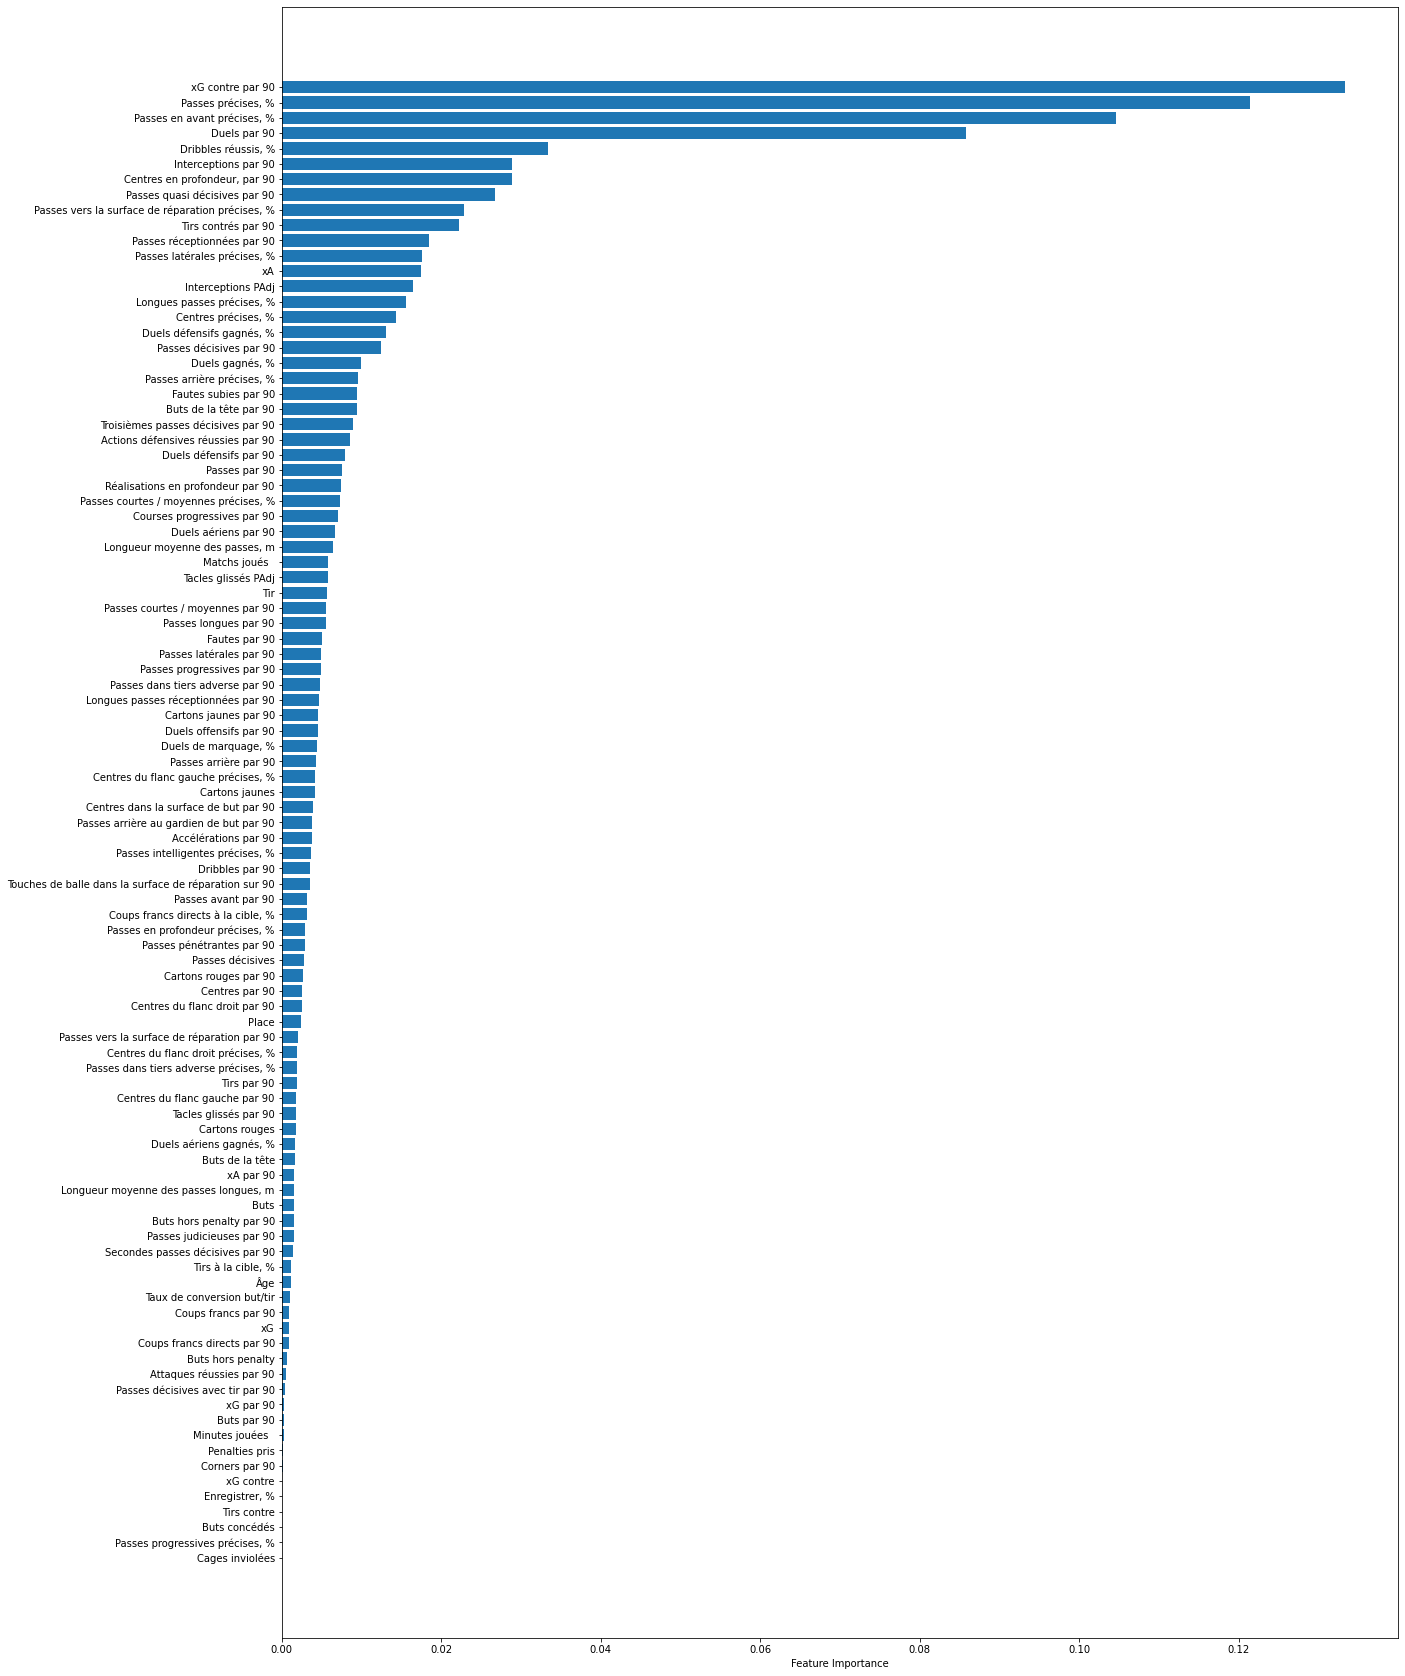

In [21]:
df_botola_pro_cleaned = df_botola_pro

features_list = df_botola_pro.columns.tolist()  # Extract all column names as a list


features_to_remove = ['Joueur', 'Équipe', 'Équipe dans la période sélectionnée', 'Contrat expiration', 'Prêté', 'Pied', 'Pays de naissance', 'Passeport pays', 'Valeur marchande', 'Buts concédés par 90', 'Buts évités', 'Buts évités par 90', 'Tirs contre par 90', 'Sorties par 90', 'Duels aériens par 90.1', 'Taille', 'Poids']
features_list = [feature for feature in features_list if feature not in features_to_remove]


df= df_botola_pro_cleaned[features_list]
df_botola_pro_cleaned = df.dropna()

X = df_botola_pro_cleaned.drop('Place', axis=1)



# Check if there are remaining samples
if X.shape[0] == 0:
    raise ValueError("No samples remaining after cleaning the dataset.")
    
def map_position(place):
    if 'AMF' in place or 'CMF' in place or 'DMF' in place:
        return 'Midfield'
    elif 'CF' in place or 'WF' in place or 'LW' in place or 'RW' in place:
        return 'Forward'
    elif 'CB' in place or 'LB' in place or 'RB' in place:
        return 'Defense'
    else:
        return place

df_botola_pro_cleaned['Place'] = df_botola_pro_cleaned['Place'].apply(map_position)

# Convert categorical target variable to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_botola_pro_cleaned['Place'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.figure(figsize=(20, 30))
plt.barh(np.array(features_list)[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()

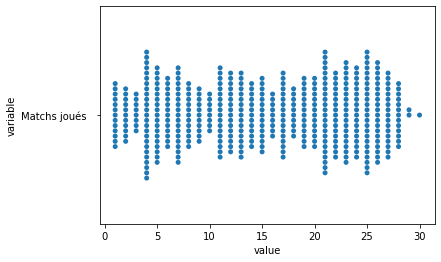

In [43]:
dataset = {
    'Matchs joués  ': df_botola_pro["Matchs joués  "]
}

df = pd.DataFrame(dataset)
#df

ax = sns.swarmplot(x="value", y="variable", data=df.melt())
artists = ax.get_children()
offsets = []
for a in artists:
    if type(a) is matplotlib.collections.PathCollection:
        offsets = a.get_offsets()
        break
plt.scatter(15, 15, color='red', zorder=10)